# Classification Using K-Nearest Neighbor Algorithm

# Challenge

In [34]:
# general imports
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sb 
from numpy import mean
from numpy import std

#data preprocessing imports
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model Building imports
from sklearn.neighbors import KNeighborsClassifier

#Model evaluation import
from sklearn.metrics import accuracy_score

#Ignoring Warnigs
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S1_Income_Data_Challenge.csv')
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


# Data Exploration

In [3]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 32561.
The number of columns in data is 14.


In [4]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [5]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# exploring the existing data types
df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [7]:
# checking missing values in data
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

<AxesSubplot:>

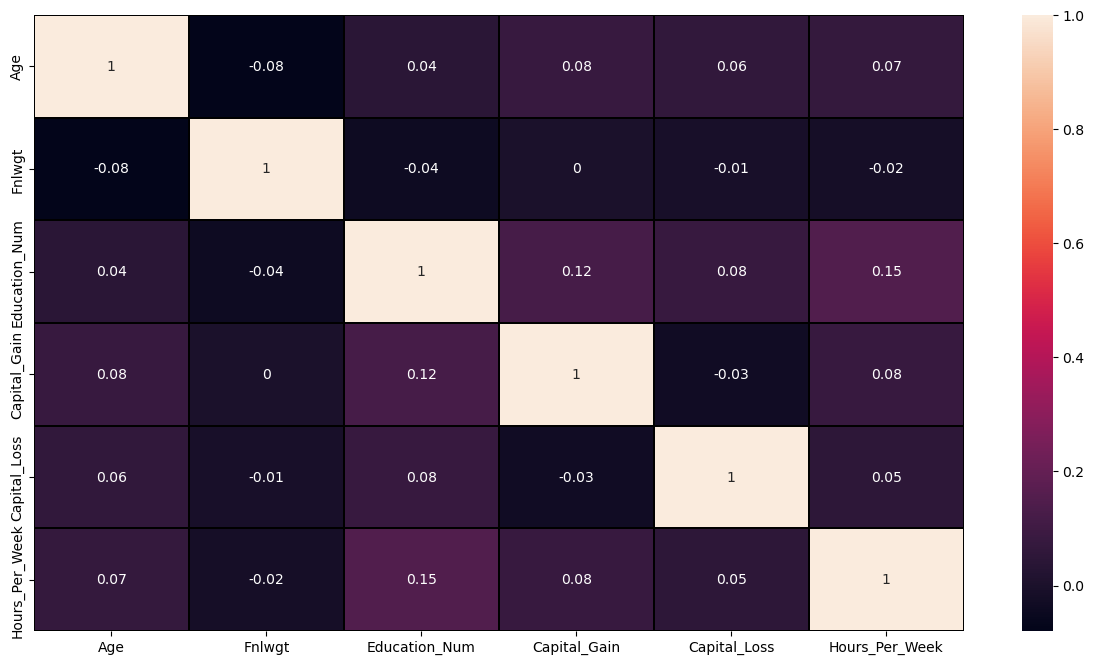

In [8]:
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True,linewidths=0.3,linecolor='black')

# Data Preparation & Visualization

In [9]:
df.replace(to_replace=' ?',value=np.nan,inplace=True)

In [10]:
# checking missing values in data
df.isnull().sum()

Age                  0
WorkClass         1836
Fnlwgt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Gender               0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     583
Income_Bracket       0
dtype: int64

In [11]:
#Missing value treatment for categorical variable
df['WorkClass'].fillna(df['WorkClass'].mode()[0],inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Native_Country'].fillna(df['Native_Country'].mode()[0],inplace=True)

In [12]:
# checking missing values in data
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [13]:
#Categorical and numerical 
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<30:
        cat.append(i)
    else:
        num.append(i)

In [16]:
cat

['WorkClass',
 'Education',
 'Education_Num',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Gender',
 'Income_Bracket']

In [17]:
num

['Age',
 'Fnlwgt',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week',
 'Native_Country']

In [18]:
#Converting Education_num to categorical data type
df['Education_Num']=df['Education_Num'].astype('category')
df.Education_Num.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: Education_Num
Non-Null Count  Dtype   
--------------  -----   
32561 non-null  category
dtypes: category(1)
memory usage: 32.6 KB


In [19]:
#Label Encoding
Lbl=LabelEncoder()

df['WorkClass']=Lbl.fit_transform(df['WorkClass'])
df['Education']=Lbl.fit_transform(df['Education'])
df['Education_Num']=Lbl.fit_transform(df['Education_Num'])
df['Marital_Status']=Lbl.fit_transform(df['Marital_Status'])
df['Occupation']=Lbl.fit_transform(df['Occupation'])
df['Relationship']=Lbl.fit_transform(df['Relationship'])
df['Gender']=Lbl.fit_transform(df['Gender'])
df['Native_Country']=Lbl.fit_transform(df['Native_Country'])
df['Income_Bracket']=Lbl.fit_transform(df['Income_Bracket'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32561 non-null  int64
 1   WorkClass       32561 non-null  int32
 2   Fnlwgt          32561 non-null  int64
 3   Education       32561 non-null  int32
 4   Education_Num   32561 non-null  int64
 5   Marital_Status  32561 non-null  int32
 6   Occupation      32561 non-null  int32
 7   Relationship    32561 non-null  int32
 8   Gender          32561 non-null  int32
 9   Capital_Gain    32561 non-null  int64
 10  Capital_Loss    32561 non-null  int64
 11  Hours_Per_Week  32561 non-null  int64
 12  Native_Country  32561 non-null  int32
 13  Income_Bracket  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [20]:
#Data Scaling

x=df.drop(columns='Income_Bracket',axis=1)
y=df['Income_Bracket']
sc=StandardScaler()
x=sc.fit_transform(x)

In [21]:
#Creating test and training datasets

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (26048, 13)
Size of test dataset:  (6513, 13)


# Training the Model

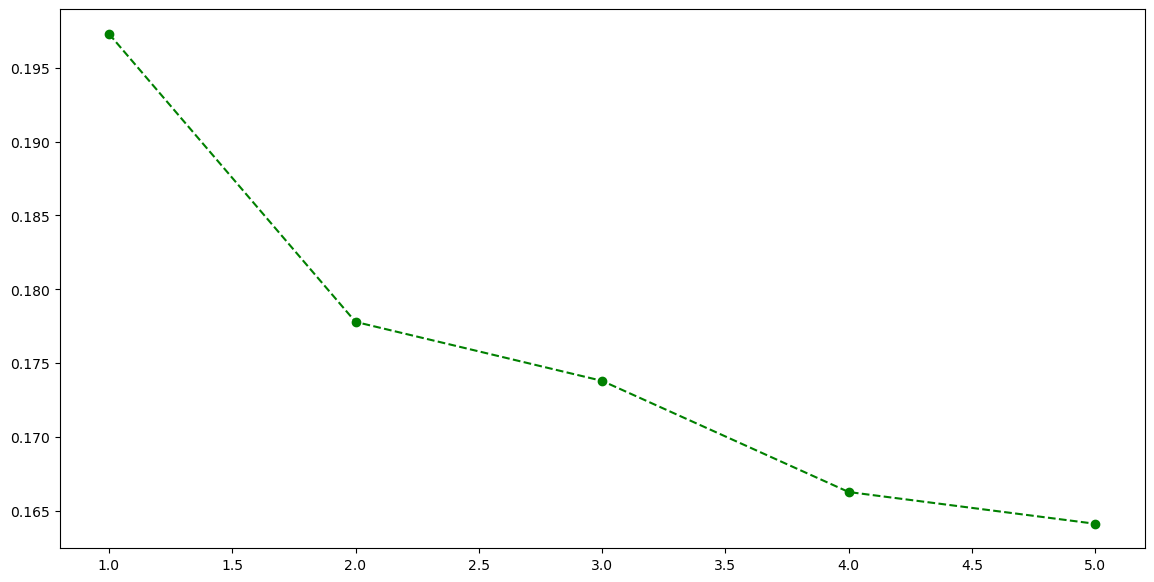

In [25]:
#Finding optimize value of k for training the KNN Model

err=[]
for k in range(1,6):
    KNN=KNeighborsClassifier(k)
    KNN.fit(x_train,y_train)
    pred=KNN.predict(x_test)
    err.append(np.mean(pred!=y_test))
plt.figure(figsize=(14,7))
plt.plot(range(1,6),err,color='g',linestyle='dashed',marker='o')
plt.show()

In [26]:
err

[0.19729771226777215,
 0.17779824965453708,
 0.17380623368647322,
 0.16628281897742975,
 0.16413327191770305]

In [28]:
#Model Building

k=5
KNN=KNeighborsClassifier(k)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
#Using the trained model to predict the outcome of the x_Test dataset

y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
#Calculating the accuracy of the training dataset using attribute .score

acc_train = round(knn.score(x_train, y_train) * 100, 2)
acc_train

87.64

In [33]:
#Calculating the accuracy of the training dataset using attribute .score

acc_test = round(knn.score(x_test, y_test) * 100, 2)
acc_test

83.59

In [35]:
#Calculating the accuracy of the model using accuracy_score

acc_test = round(accuracy_score(y_pred,y_test) * 100, 2)
acc_test

83.59